In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings("ignore")

![](Ekran_Alıntısı.jpg)

In [2]:
df=pd.read_csv("datasets_436_920_xAPI-Edu-Data.csv",index_col=0 ).reset_index() 

# First 5 rows in the dataset:
display(df.head())

,index,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


# Define Varibles

In [3]:
# Dataset's variables type:
print(df.info(),"\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 18 columns):
index                       480 non-null int64
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(5), object(13)
memory 

In [4]:
# Count of unique values in the dataset:
print("Count of Unique Values:\n ",df.nunique(),"\n")

Count of Unique Values:
  index                       480
gender                        2
NationalITy                  14
PlaceofBirth                 14
StageID                       3
GradeID                      10
SectionID                     3
Topic                        12
Semester                      2
Relation                      2
raisedhands                  82
VisITedResources             89
AnnouncementsView            88
Discussion                   90
ParentAnsweringSurvey         2
ParentschoolSatisfaction      2
StudentAbsenceDays            2
Class                         3
dtype: int64 



In [5]:
# Count of rows and columns in the dataset:
print("Count of row and column: ","\n",df.shape)

Count of row and column:  
 (480, 18)


In [6]:
# Count of  unique "Topic" column
print("Count of  unique Topic column: ","\n\n", df["Topic"].value_counts(), "\n")
# There are 12 diffrent subjects

display(pd.crosstab(df["NationalITy"],df["Topic"]).reset_index())
# According to nationality count of Topic

Count of  unique Topic column:  

 IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Geology      24
Chemistry    24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64 



Topic,NationalITy,Arabic,Biology,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish
0,Egypt,0,0,0,1,2,0,0,1,1,1,3,0
1,Iran,0,0,0,0,2,0,0,2,0,0,0,2
2,Iraq,6,4,2,2,2,2,2,0,0,0,2,0
3,Jordan,21,16,22,17,33,20,8,4,0,5,24,2
4,KW,20,0,0,15,5,0,7,82,15,8,13,14
5,Lybia,0,2,0,0,4,0,0,0,0,0,0,0
6,Morocco,3,0,0,0,1,0,0,0,0,0,0,0
7,Palestine,4,6,0,6,4,2,2,0,0,0,4,0
8,SaudiArabia,1,0,0,1,1,0,0,2,1,1,3,1
9,Syria,0,2,0,0,3,0,0,0,0,1,0,1


In [7]:
# "Topic" column should be "category" variable type. So,
df["Topic"]=df["Topic"].astype('category')

# "StageID" also,
df["StageID"]=df["StageID"].astype('category')

# "StudentAbsenceDays"  also,
df["StudentAbsenceDays"]=df["StudentAbsenceDays"].astype('category')

# "Class"  also,
df["Class"]=df["Class"].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 18 columns):
index                       480 non-null int64
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null category
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null category
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null category
Class                       480 non-null category
dtypes: category(4), int64(5

.info() metoduyla veri setini incelersek; toplam 480 satır ve 17 kolondan oluşmaktadır ve veriler object ve int64 tiplidir. 

Her bir kolon için değişken tipleri:
* Gender: Object tipli olmakla birlikte sadece male ve female değerlerini aldığı için kategorik binary değişken olmaktadır.
* NationalITy: object tipli kategorik norminal değişkendir.
* PlaceofBirth: object tipli kategorik nominal değişkendir
* StageID: object tipli kategorik ordinal değişkendir
* GradeID: object tipli kategorik ordinal değişkendir
* SectionID: object tipli kategorik ordinal değişkendir
* Topic: object tipli kategorik nominal değişkendir
* Semester: object tipli kategorik binary değişkendir
* Relation: object tipli kategorik binary değişkendir
* raisedhands: int tipinde sürekli değişkendir.
* VisITedResource: int tipinde sürekli değişkendir.
* AnnouncementsView: int tipinde sürekli değişkendir
* Discussion: int tipinde sürekli değişkendir
* ParentAnsweringSurvey: object tipli kategorik binary değişkendir
* ParentschoolSatisfaction: object tipli kategorik binary değişkendir
* StudentAbsenceDays: object tipli kategorik ordinal değişkendir
* Class: object tipli kategorik ordinal değişkendir

In [8]:
# sum of null values for each variables:
print("Count of null values: \n" ,df.isna().sum(),"\n")

Count of null values: 
 index                       0
gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64 



Missing value olup olmadığını ise df.isna().sum()  metoduyla yaparız.Sonucunda da her bir kolon için kayıp değer olmadığını görmüş olduk.

Veri keşfi aşamasında missing values olmadığı için, integer ve object olması gereken alanlar doğru veri tipiyle gösterildiği için verinin temiz olduğu anlaşılmıştır. Yani veri üzerinde satırların doldurulması ya da karakter dönüşümü gibi işlemlerin yapılmasına gerek yoktur. Ancak sonraki aşamlarda yeni bir kategorik değişkene ya da sürekli değişkene ihtiyacım olursa mevcuttaki veri setinden türeterek yeni kolon eklemesi gibi işlemler yapılabilir. Veri setini genel olarak inceledikten sonra tek tek değişkenleri analiz etmeye sorun varsa da düzenlemeye sıra gelmiştir.

Bir sonraki adım, sürekli değişkenlerin aykırı değerlere sahip olup olmadığını tespit etmektir. Bunun için integer tipli 4 sürekli değişkenin boxplot'ı çizdirilir ve aykırı değerler tespit edilerek optimum sayıda aykırı değerlerden oluşan değişkenler netleştirilir. Outliers değerlerden kurtulmak için whiskers uzunluğu uzun tutulabilir ve geride kalan outlierslar veri setinden çıkarılabilir, bir diğer yöntem winsorize metodu ile değişkenler sınırlandırılabilir ya da log ve karekök metodu ile de aykırı değerlerden kurtulabilir. Winsorize, log ve karekök metotlarında amaç, outliers değerlerin sayısını azaltmak değil outliers değerlerinin etkisini azaltmaktır.

In [4]:
# 4 sürekli değişkenin ağırlıklı ortalamasından oluşan ve öğrenci başarısını ifade eden tek bir değişken tanımı yapalım:
# Her bir numerik değişkeni aralıklara ayıralım:

df["weighted_rh"]=pd.cut(x=df["raisedhands"], bins=[-1,25,50,75,100], labels=[2,3,4,5])
df["weighted_vr"]=pd.cut(x=df["VisITedResources"], bins=[-1,25,50,75,100], labels=[2,3,4,5])
df["weighted_av"]=pd.cut(x=df["AnnouncementsView"], bins=[-1,25,50,75,100], labels=[2,3,4,5])
df["weighted_dis"]=pd.cut(x=df["Discussion"], bins=[-1,25,50,75,100], labels=[2,3,4,5])

# Her bir değişken için oluşturulan ağırlıklar 'category' formatında olduğundan bu datalar üzerinde işlem yapılabilmesi için
# int64 formatına dönüştürelim.

df["weighted_rh"]=df["weighted_rh"].astype('int64')
df["weighted_vr"]=df["weighted_vr"].astype('int64')
df["weighted_av"]=df["weighted_av"].astype('int64')
df["weighted_dis"]=df["weighted_dis"].astype('int64')

# Verilen ağırlıklarla tüm değişkenleri ifade eden tek bir öğrenci başarısı değişkeni tanımlayalım:

df["studentsuccess"]=((df["raisedhands"]*df["weighted_rh"])+(df["VisITedResources"]*df["weighted_vr"])+
                      (df["AnnouncementsView"]*df["weighted_av"])+(df["Discussion"]*df["weighted_dis"]))/
                      (df["weighted_rh"]+df["weighted_vr"]+df["weighted_av"]+df["weighted_dis"])
df.head(3)

,index,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,...,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,weighted_rh,weighted_vr,weighted_av,weighted_dis,studentsuccess
0,0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,...,20,Yes,Good,Under-7,M,2,2,2,2,13.250000
1,1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,...,25,Yes,Good,Under-7,M,2,2,2,2,17.000000
2,2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,...,30,No,Bad,Above-7,L,2,2,2,3,13.777778


In [5]:
# Statistical variables for each column:
df.describe()

# Standart deviation is more than half of the mean, so these continous variables can not have normal distribution 
# But to make sure it can be analyzed by statistical distributions

,index,raisedhands,VisITedResources,AnnouncementsView,Discussion,weighted_rh,weighted_vr,weighted_av,weighted_dis,studentsuccess
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,239.500000,46.775000,54.797917,37.918750,43.283333,3.343750,3.708333,3.039583,3.208333,50.055608
std,138.708327,30.779223,33.080007,26.611244,27.637735,1.203926,1.281934,1.054118,1.095794,23.592534
min,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000
25%,119.750000,15.750000,20.000000,14.000000,20.000000,2.000000,2.000000,2.000000,2.000000,29.434091
50%,239.500000,50.000000,65.000000,33.000000,39.000000,3.000000,4.000000,3.000000,3.000000,53.594156
75%,359.250000,75.000000,84.000000,58.000000,70.000000,4.000000,5.000000,4.000000,4.000000,69.441176
max,479.000000,100.000000,99.000000,98.000000,99.000000,5.000000,5.000000,5.000000,5.000000,92.000000


# Data Visualization

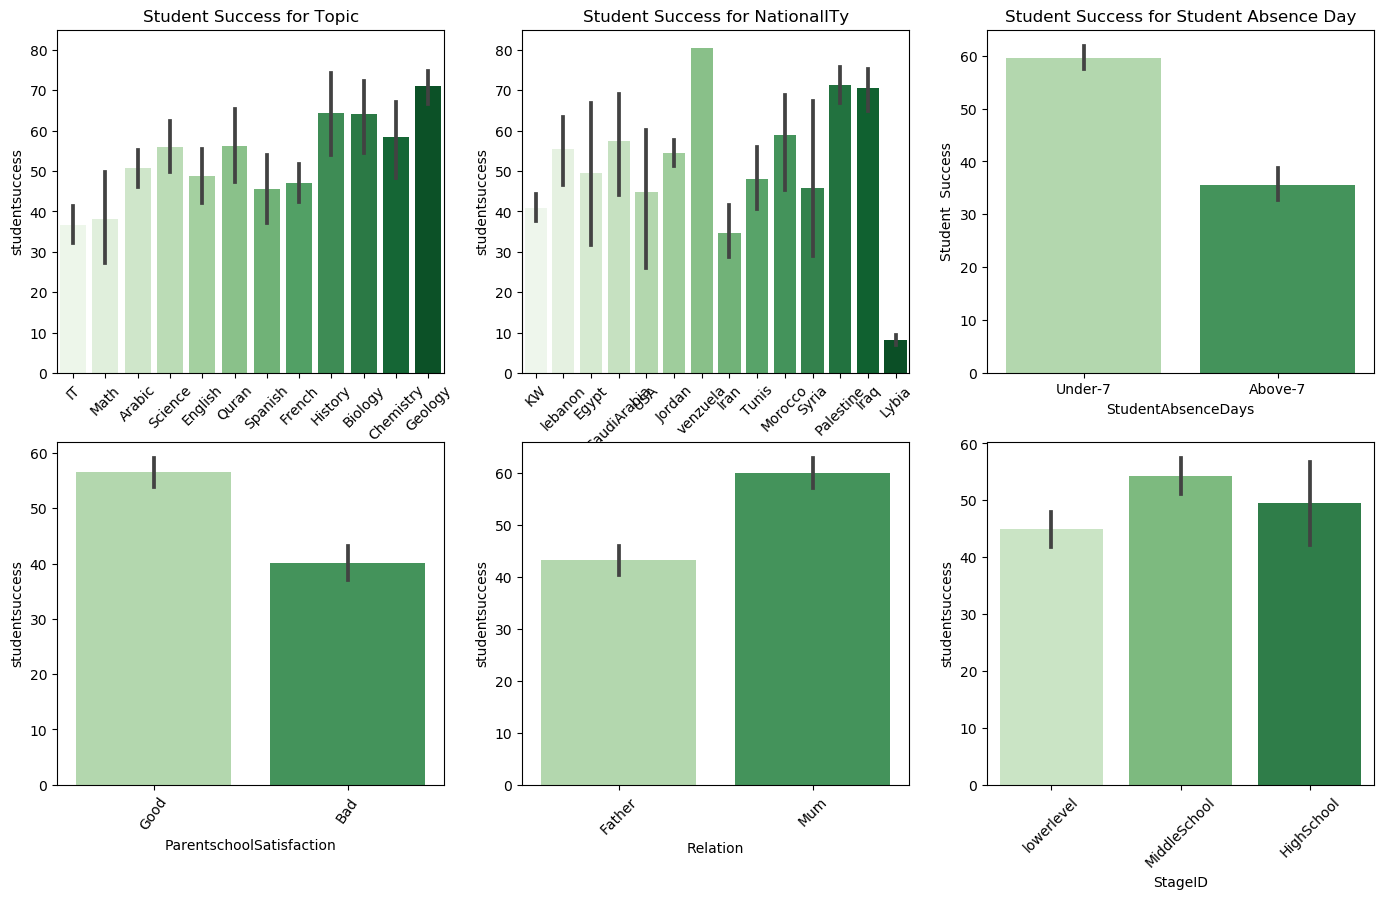

In [6]:
# Let's visualize the dataset to analyze it better 

plt.figure(figsize=(17,10), dpi=100)
plt.subplot(2,3,1)
plt.title("Student Success for Topic")
sns.barplot(df["Topic"],y=df["studentsuccess"], data=df, palette="Greens")
plt.xticks(rotation=45)
plt.ylim(0,85)

plt.subplot(2,3,2)
plt.title("Student Success for NationalITy")
sns.barplot(df["NationalITy"],y=df["studentsuccess"], data=df, palette="Greens")
plt.xticks(rotation=45)
plt.ylim(0,85)

plt.subplot(2,3,3)
plt.title("Student Success for Student Absence Day")
sns.barplot(df["StudentAbsenceDays"],y=df["studentsuccess"], data=df, palette="Greens")
plt.ylabel("Student  Success")
    
plt.subplot(2,3,4)
sns.barplot(x=df["ParentschoolSatisfaction"], y=df["studentsuccess"], data=df, palette="Greens")
plt.xticks(rotation=55)

plt.subplot(2,3,5)
sns.barplot(x=df["Relation"], y=df["studentsuccess"], data=df, palette="Greens")
plt.xticks(rotation=45)

plt.subplot(2,3,6)
sns.barplot(x=df["StageID"], y=df["studentsuccess"], data=df, palette="Greens")
plt.xticks(rotation=45)

plt.show()


In [10]:
# Ülkelerin bölümlere göre başarılı öğrenci oranları:

df.groupby("Topic")["studentsuccess"].mean().sort_values().reset_index()

topic_natio=df.groupby(by=["NationalITy","Topic"])["studentsuccess"].mean().reset_index()
topic_natio.head()

fig=px.bar(topic_natio, x="NationalITy", y="studentsuccess", color="Topic")
fig.show()

# Grafikten çıkardığımız sonuçlara göre: 

# Venezuela' da sadece IT eğitimi verilmesine rağmen IT'deki en yüksek başarı oranı bu ülkede,tüm dünya ülkelerini geçmektedir,
# Biyoloji bölümünde okuyan en başarılı öğrenciler Suriye' den çıkmaktadır.
# Bilim alanında en başarılı ülke Filistin' dir.
# İngilizce bölümündeki başarı oranı en yüksek USA olması beklenirken Lübnan' dır.
# Fransızca bölümündeki en başarılı öğrenciler Saudi Arabistan' dadır.
# Kimya bölümünde okuyan öğrenciler sadece Irak ve Ürdün' de yaşamaktadır. Irak' taki başarı oranı Ürdün'den yüksektir.
# Filistin' deki öğrenciler en çok Biyoloji bölümünde başarılıdırlar.
# Matematik bölümünde en başarılı öğrenciler ise Arabistan' dadır.
# Tüm ülke ve bölümlere göre en başarılı öğrenciler Irak' ta yaşayıp Kimya bölümünde okuyanlardır.

# OUTLIERS

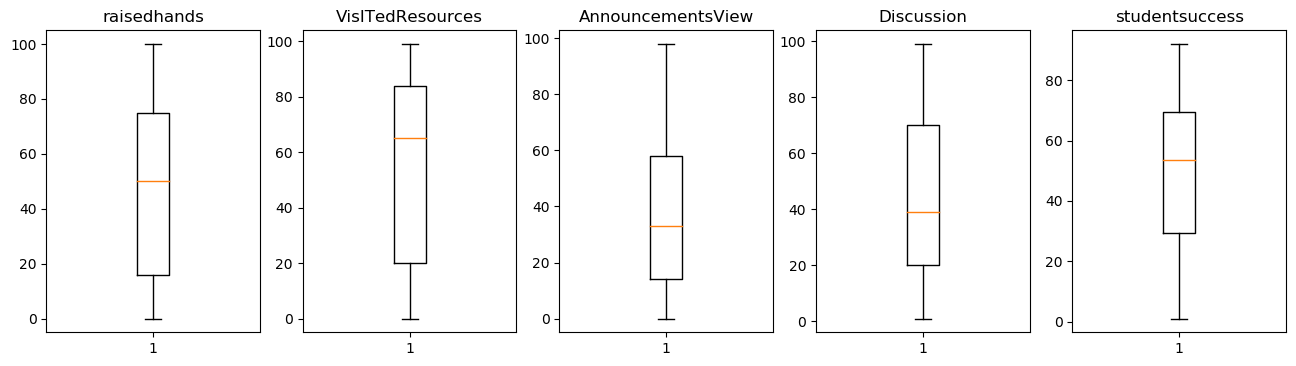

In [11]:
plt.figure(figsize=(16,4), dpi=100)

column=["raisedhands","VisITedResources","AnnouncementsView","Discussion","studentsuccess"]
for i in range(len(column)):
    plt.subplot(1,5,i+1)
    plt.title("{}".format(column[i]))
    plt.boxplot(df[column[i]], whis=1.5 )
plt.show()        
        
# 5 sürekli değişkenin boxplot'ını çizdirdiğimizde whis=1.5 için aykırı değerlerin olmadığı; ancak whis=0.5 için 
# "AnnouncementsWiew" ile "Discussion" değişkenlerinde outliers gözlenmiştir.
# İstatistiksel olarak emin olmak için sırayla scipy kütüphanesinden zscore; numpy kütüphanesinden 
# percentile (tukey metodu) uygulayarak kanıtlayalım.


In [10]:
zscores=zscore(df["raisedhands"])
zscores=pd.DataFrame(zscores)

for threshold in range(1,5):
    print("Threshold value is {}: ".format(threshold))
    print("--"*10)
    print("Count of outliers: ",len(np.where(zscores>threshold)[0]),"\n")



Threshold value is 1: 
--------------------
Count of outliers:  111 

Threshold value is 2: 
--------------------
Count of outliers:  0 

Threshold value is 3: 
--------------------
Count of outliers:  0 

Threshold value is 4: 
--------------------
Count of outliers:  0 



In [34]:
# PERCENTILE METHOD

column=["raisedhands","VisITedResources","AnnouncementsView","Discussion","studentsuccess"]
IQR=[]

for i in range(len(column)):        
    q75,q25=np.percentile(df[column[i]], [75,25])
    IQR.append(q75-q25)

df_interqu=pd.DataFrame(columns=column)
df_interqu=df_interqu.append({"raisedhands":IQR[0],
                              "VisITedResources":IQR[1],
                              "AnnouncementsView":IQR[2],
                              "Discussion":IQR[3],
                              "studentsuccess":IQR[4]}, ignore_index=True)
display(df_interqu)

#  Describe() ile de görebildiğimiz %25 ve %75 aralıklarındaki değerler arasındaki fark yani 1. ve 3. çeyreklikler 
# arasındaki fark, percentile metodu ile de bulunabilir. Buradaki amaç, interquartile'lerin dışında kalan değerler 
# outliers olarak kabul edildiğinden zscore da yaptığımız gibi percentile'de de outliers değerlerin sayısını bulmaktır. 

,raisedhands,VisITedResources,AnnouncementsView,Discussion,studentsuccess
0,59.25,64.0,44.0,50.0,40.007086


# RELATIONSHIPS BETWEEN NUMERIC VARIABLES

<Figure size 1800x500 with 0 Axes>

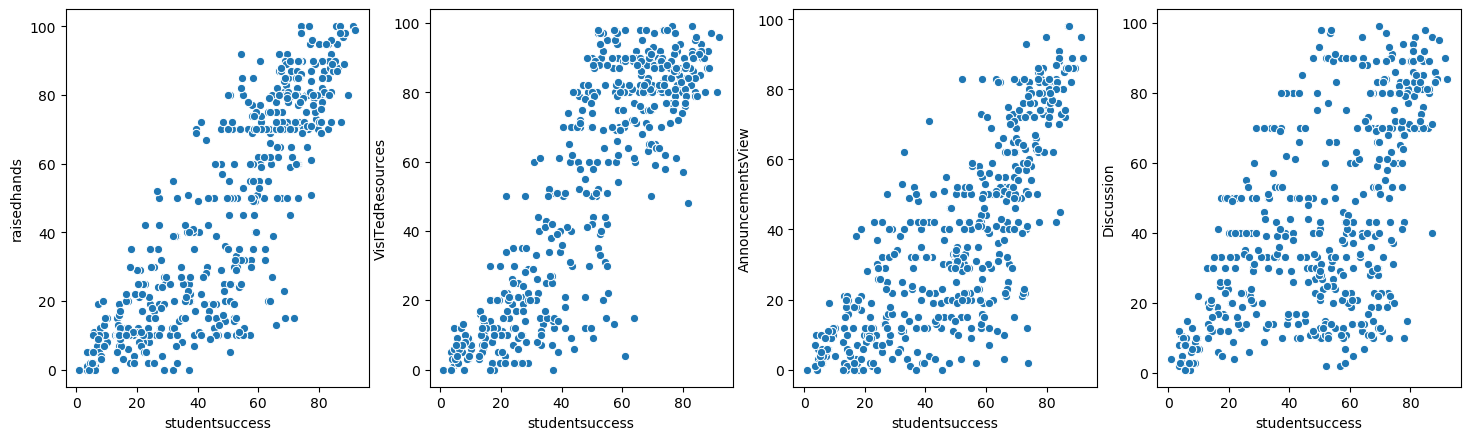

In [43]:
plt.figure(figsize=(18,5),dpi=100)

column=["raisedhands","VisITedResources","AnnouncementsView","Discussion"]

plt.figure(figsize=(18,5), dpi=100)
for i in range(len(column)):
    plt.subplot(1,4,i+1)
    sns.scatterplot(y=df[column[i]], x=df["studentsuccess"], data=df)

plt.show()

# Scatter grafiğinde, öğrenci başarısıyla kurs içeriklerinin takibi arasında pozitif ilişki olduğu görülmektedir. 

In [12]:
# Öğrenci başarısına en çok katkı sağlayan faktörler ve ilişkileri:

correlation=df[["raisedhands","VisITedResources","AnnouncementsView","Discussion","studentsuccess"]].corr()
correlation

#Korelasyon tablosunda da gördüğümüz üzere öğrenci başarısına en çok etki eden faktör %86 ile kurs içeriğinin takip edilmesidir


,raisedhands,VisITedResources,AnnouncementsView,Discussion,studentsuccess
raisedhands,1.000000,0.691572,0.643918,0.339386,0.841824
VisITedResources,0.691572,1.000000,0.594500,0.243292,0.861251
AnnouncementsView,0.643918,0.594500,1.000000,0.417290,0.780835
Discussion,0.339386,0.243292,0.417290,1.000000,0.590005
studentsuccess,0.841824,0.861251,0.780835,0.590005,1.000000


In [35]:
# Bölümlere göre başarıyla ilişkili faktörler değişebileceğinden gruplama ile korelasyonu inceleyelim:

corr_topic=df.groupby("Topic")[["raisedhands","VisITedResources","AnnouncementsView","Discussion","studentsuccess"]].corr()
corr_topic.head(20)

# Bölümlere göre öğrenci başarısını etkileyen faktörler değişmektedir. Örneğin, Biyoloji'de el kaldırma etkiliyken, İngilizce'de
# duyuruların takip edilmesi başarıya etkili faktörlerdendir.

raisedhands  VisITedResources  AnnouncementsView  \
Topic                                                                           
Arabic    raisedhands           1.000000          0.539207           0.345734   
          VisITedResources      0.539207          1.000000           0.381720   
          AnnouncementsView     0.345734          0.381720           1.000000   
          Discussion           -0.270225         -0.022325           0.121109   
          studentsuccess        0.622034          0.809931           0.550855   
Biology   raisedhands           1.000000          0.874381           0.786214   
          VisITedResources      0.874381          1.000000           0.597996   
          AnnouncementsView     0.786214          0.597996           1.000000   
          Discussion            0.659870          0.605063           0.825340   
          studentsuccess        0.958226          0.920333           0.843720   
Chemistry raisedhands           1.000000          0.801438           0.816811   
          VisITedResources      0.801438          1.000000           0.674544   
          AnnouncementsView     0.816811          0.674544           1.000000   
          Discussion            0.134693         -0.071479           0.021856   
          studentsuccess        0.897803          0.876832           0.802109   
English   raisedhands           1.000000          0.511611           0.683936   
          VisITedResources      0.511611          1.000000           0.610782   
          AnnouncementsView     0.683936          0.610782           1.000000   
          Discussion            0.362600          0.433948           0.592792   
          studentsuccess        0.801385          0.818904           0.844370   

                             Discussion  studentsuccess  
Topic                                                    
Arabic    raisedhands         -0.270225        0.622034  
          VisITedResources    -0.022325        0.809931  
          AnnouncementsView    0.121109        0.550855  
          Discussion           1.000000        0.386084  
          studentsuccess       0.386084        1.000000  
Biology   raisedhands          0.659870        0.958226  
          VisITedResources     0.605063        0.920333  
          AnnouncementsView    0.825340        0.843720  
          Discussion           1.000000        0.799910  
          studentsuccess       0.799910        1.000000  
Chemistry raisedhands          0.134693        0.897803  
          VisITedResources    -0.071479        0.876832  
          AnnouncementsView    0.021856        0.802109  
          Discussion           1.000000        0.294274  
          studentsuccess       0.294274        1.000000  
English   raisedhands          0.362600        0.801385  
          VisITedResources     0.433948        0.818904  
          AnnouncementsView    0.592792        0.844370  
          Discussion           1.000000        0.717521  
          studentsuccess       0.717521        1.000000

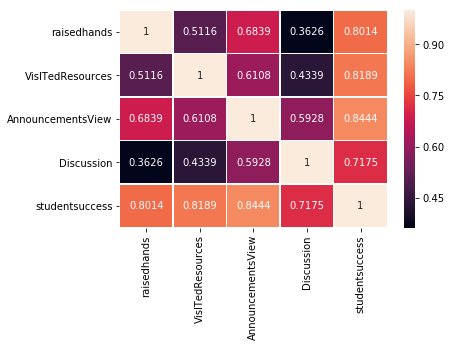

In [15]:
corr_english=df[df["Topic"]=="English"][["raisedhands","VisITedResources","AnnouncementsView","Discussion","studentsuccess"]].corr()
sns.heatmap(corr_english, annot=True, linewidth=0.5, fmt='.4g')

plt.show()

# Korelasyon grafiğinden de görüldüğü gibi öğrenci başarısıyla ilişkili faktörler bölümlere göre değişmektedir.

# T-test

In [17]:
# Veli memnuniyetiyle öğrenci başarısı arasında bir ilişki var mı?
# %95 güven aralığında veli memnuniyetiyle öğrenci başarısı arasında ilişki varsa H0 yoksa; HA (p<0.05) seçilir.

pd.options.display.float_format= '{:.15f}'.format

df_satisfied=df["ParentschoolSatisfaction"].unique()

for var in ["raisedhands","VisITedResources","AnnouncementsView","Discussion","studentsuccess"]:
    comparison=pd.DataFrame(columns=["Satisfied","Not_Satisfied","statistic","p_value"])
    print("Comparison for {}".format(var), end='')
    for i in range(0, len(df_satisfied)):
        for j in range(i+1, len(df_satisfied)):
            ttest=stats.ttest_ind(df[df["ParentschoolSatisfaction"]==df_satisfied[i]][var],
                                  df[df["ParentschoolSatisfaction"]==df_satisfied[j]][var])
           
            Satisfied=df_satisfied[i]
            Not_Satisfied=df_satisfied[j]
            statistic=ttest[0]
            p_value=ttest[1]
            
            comparison=comparison.append({"Satisfied":Satisfied,
                                         "Not_Satisfied":Not_Satisfied,
                                         "statistic":statistic,
                                          "p_value":p_value}, ignore_index=True)
    display(comparison)            

    
# Sonuçlara göre, "Discussion" hariç diğer faktörler, velinin memnuniyetiyle öğrenci başarısı arasında pozitif ilişki 
# olduğunu göstermektedir. p<0.05 olduğu için HA kabul edilir, yani velinin okuldan memnuniyetiyle öğrenci başarısı arasında önemli bir ilişki vardır,

Comparison for raisedhands

,Satisfied,Not_Satisfied,statistic,p_value
0,Good,Bad,6.800582456385809,0.000000000031212


Comparison for VisITedResources

,Satisfied,Not_Satisfied,statistic,p_value
0,Good,Bad,8.539909918129604,0.000000000000000


Comparison for AnnouncementsView

,Satisfied,Not_Satisfied,statistic,p_value
0,Good,Bad,6.844054115364828,0.000000000023688


Comparison for Discussion

,Satisfied,Not_Satisfied,statistic,p_value
0,Good,Bad,1.338432532756007,0.181391747567038


Comparison for studentsuccess

,Satisfied,Not_Satisfied,statistic,p_value
0,Good,Bad,7.940981928443439,0.000000000000014


In [54]:
# iki kategorik değişken arasındaki ilişki ki-kare testi ile incelenebilir.
# Test sonucunda p<0.05 olduğu için HA kabul edilir ülkeler ile bölümler arasında önemli bir ilişki/fark vardır denilebilir.


pd.options.display.float_format= '{:.15f}'.format
natio_topic=pd.crosstab(df["NationalITy"],df["Topic"])
display(natio_topic)

print(stats.chisquare(natio_topic, axis=None))

Topic,Arabic,Biology,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish
NationalITy,,,,,,,,,,,,
Egypt,0,0,0,1,2,0,0,1,1,1,3,0
Iran,0,0,0,0,2,0,0,2,0,0,0,2
Iraq,6,4,2,2,2,2,2,0,0,0,2,0
Jordan,21,16,22,17,33,20,8,4,0,5,24,2
KW,20,0,0,15,5,0,7,82,15,8,13,14
Lybia,0,2,0,0,4,0,0,0,0,0,0,0
Morocco,3,0,0,0,1,0,0,0,0,0,0,0
Palestine,4,6,0,6,4,2,2,0,0,0,4,0
SaudiArabia,1,0,0,1,1,0,0,2,1,1,3,1


Power_divergenceResult(statistic=3760.5999999999995, pvalue=0.0)


In [56]:
pd.options.display.float_format='{:.15f}'.format
natio_stfcn=pd.crosstab(df["ParentschoolSatisfaction"],df["NationalITy"])
display(natio_stfcn,"\n")

print(stats.chisquare(natio_stfcn, axis=None))

# Ülkeler ile ailenin okuldan emnuniyeti arasında anlamlı bir ilişki olup olmadığını anlamak için p değerine bakarız
# p>0.05 olduğu için ülkeler ile aile memnuniyeti arasında anlamlı bir fark yoktur denilebilir.

NationalITy,Egypt,Iran,Iraq,Jordan,KW,Lybia,Morocco,Palestine,SaudiArabia,Syria,Tunis,USA,lebanon,venzuela
ParentschoolSatisfaction,,,,,,,,,,,,,,
Bad,2,3,0,66,90,0,3,0,7,2,7,1,7,0
Good,7,3,22,106,89,6,1,28,4,5,5,5,10,1


'\n'

Power_divergenceResult(statistic=1464.95, pvalue=2.9811967264679184e-292)


In [63]:
print("Raisedhands & success:","\n",stats.ttest_ind(df["raisedhands"], df["studentsuccess"], equal_var=False),"\n")
print("Visited resources & success:","\n",stats.ttest_ind(df["VisITedResources"], df["studentsuccess"], equal_var=False),"\n")
print("Announcement view & success:","\n",stats.ttest_ind(df["AnnouncementsView"], df["studentsuccess"], equal_var=False),"\n")
print("Discussion & success:","\n",stats.ttest_ind(df["Discussion"], df["studentsuccess"], equal_var=False))

# Öğrenci başarısındaki artış ile öğrencilerin dersi takip etmeleri arasında pozitif ilişki vardır denilebilir.

Raisedhands & success: 
 Ttest_indResult(statistic=-1.8533423563559652, pvalue=0.0641613476945868) 

Visited resources & success: 
 Ttest_indResult(statistic=2.5571179353735114, pvalue=0.010723718661050262) 

Announcement view & success: 
 Ttest_indResult(statistic=-7.476904036635592, pvalue=1.7355757625021424e-13) 

Discussion & success: 
 Ttest_indResult(statistic=-4.0831362470527, pvalue=4.823415949289362e-05)


In [18]:
# Velisinin anne/baba olmasının öğrenci başarısına etkisi var mı?

pd.options.display.float_format= '{:.15f}'.format
relation=df["Relation"].unique()


for var in ["raisedhands","VisITedResources","AnnouncementsView","Discussion","studentsuccess"]: #önce sürekli değişkenler
    relation_df=pd.DataFrame(columns=["group_1","group_2","statistic","p_value"])
    print("{}:".format(var),end='')
    for i in range(0,len(relation)): # kategorik değişken
        for j in range(i+1,len(relation)):
            ttest=stats.ttest_ind(df[df["Relation"]==relation[i]][var],
                                  df[df["Relation"]==relation[j]][var])
            
            group_1=relation[i]
            group_2=relation[j]
            statistic=ttest[0]
            p_value=ttest[1]
            
            relation_df=relation_df.append({"group_1":group_1,
                                            "group_2":group_2,
                                            "statistic":statistic,
                                            "p_value":p_value}, ignore_index=True)
    display(relation_df)

# T-testinden de görüldüğü gibi velinin anne/baba olması öğrencinin başarısında etkilidir.

raisedhands:

,group_1,group_2,statistic,p_value
0,Father,Mum,-8.550767043631989,0.000000000000000


VisITedResources:

,group_1,group_2,statistic,p_value
0,Father,Mum,-8.442872220285047,0.000000000000000


AnnouncementsView:

,group_1,group_2,statistic,p_value
0,Father,Mum,-7.891382147237614,0.000000000000021


Discussion:

,group_1,group_2,statistic,p_value
0,Father,Mum,-0.584385879020267,0.559236423775819


studentsuccess:

,group_1,group_2,statistic,p_value
0,Father,Mum,-8.236718784695306,0.000000000000002


In [19]:
# Öğrencinin okula gelmediği gün sayısı ile başarısı arasında bir ilişki var mı?

df_absence=df["StudentAbsenceDays"].unique()

for var in ["raisedhands","VisITedResources","AnnouncementsView","Discussion","studentsuccess"]:
    print("{}: ". format(var),end=' ')
    absence_comparison=pd.DataFrame(columns=["group_1","group_2","statistic","p_value"])
    for i in range(0,len(df_absence)):
        for j in range(i+1,len(df_absence)):
            ttest=stats.ttest_ind(df[df["StudentAbsenceDays"]==df_absence[i]][var],
                                 df[df["StudentAbsenceDays"]==df_absence[j]][var])
            
            absence_comparison=absence_comparison.append({"group_1":df_absence[i],
                                                         "group_2":df_absence[j],
                                                         "statistic":ttest[0],
                                                         "p_value":ttest[1]}, ignore_index=True)
    display(absence_comparison)
    

# T-test sonucuna göre, öğrencinin okula gelip gelmemesi başarısını etkilemektedir 

raisedhands:  

,group_1,group_2,statistic,p_value
0,Under-7,Above-7,11.448219051313492,0.000000000000000


VisITedResources:  

,group_1,group_2,statistic,p_value
0,Under-7,Above-7,12.590100172939012,0.000000000000000


AnnouncementsView:  

,group_1,group_2,statistic,p_value
0,Under-7,Above-7,7.183135847940291,0.000000000002629


Discussion:  

,group_1,group_2,statistic,p_value
0,Under-7,Above-7,4.901932020251381,0.000001302129111


studentsuccess:  

,group_1,group_2,statistic,p_value
0,Under-7,Above-7,12.527851846765049,0.000000000000000


# Normality Test

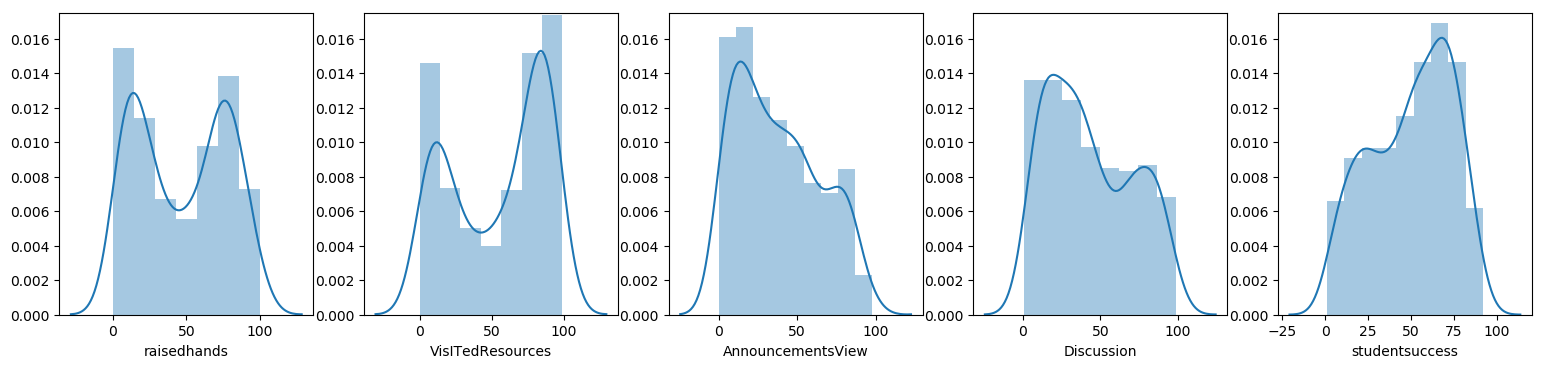

In [20]:
# Değişkenlerin normal dağılım olup olmadığını histogram grafiği ile görselleştirelim

plt.figure(figsize=(19,4), dpi=100)

column=["raisedhands","VisITedResources","AnnouncementsView","Discussion","studentsuccess"]

for i in range(len(column)):
    plt.subplot(1,5,i+1)
    sns.distplot(df[column[i]])
    plt.ylim(0,0.0175)
plt.show()    
    
# Görselleştirme ile değişkenlerimiz normal dağılım göstermemektedir, emin olmak için scipy kütüphanesinden 
# jarque-bera ve normal testleri sırayla yapalım.

In [21]:
# JARQUE - BERA TESTİ İLE:

from scipy.stats import jarque_bera

pd.options.display.float_format='{:.8f}'.format

variables=["raisedhands","VisITedResources","AnnouncementsView","Discussion","studentsuccess"]
distributions=pd.DataFrame(columns=["variable","jarque_bera_stats","jarque_bera_pvalue"])

for i in variables:
    jb=jarque_bera(df[i])
    distributions=distributions.append({"variable":i,
                                       "jarque_bera_stats":jb[0],
                                       "jarque_bera_pvalue":jb[1]}, ignore_index=True)

distributions

# H0 --> Data has normal distribution
# H1 --> Data does not have normal distribution

# p<0.05 olduğu için 4 sürekli değişken normal dağılım değildir.

,variable,jarque_bera_stats,jarque_bera_pvalue
0,raisedhands,44.69397083,0.00000000
1,VisITedResources,53.26409181,0.00000000
2,AnnouncementsView,32.84457194,0.00000007
3,Discussion,35.86984533,0.00000002
4,studentsuccess,29.47928620,0.00000040


In [66]:
# NORMAL TESTİ İLE:

from scipy.stats import normaltest
pd.options.display.float_format='{:.6f}'.format

variables=["raisedhands","VisITedResources","AnnouncementsView","Discussion","studentsuccess"]
distributions=pd.DataFrame(columns=["variable","normal_test_stats","normal_test_pvalue"])

for i in variables:
    norm=normaltest(df[i])
    distributions=distributions.append({"variable":i,
                                       "normal_test_stats":norm[0],
                                       "normal_test_pvalue":norm[1]}, ignore_index=True)

distributions

# normal test ile de p < 0.05 olduğu için verilerin normal dağılmadığı anlaşılmıştır.

,variable,normal_test_stats,normal_test_pvalue
0,raisedhands,4423.427121,0.000000
1,VisITedResources,4721.113310,0.000000
2,AnnouncementsView,109.706677,0.000000
3,Discussion,198.798339,0.000000
4,studentsuccess,118.577866,0.000000


# Normalization and Standardization

In [44]:
# Verilerde aykırı değerler olmadığı için winsorize etmeye ya da logaritmasını almaya gerek yoktur, direkt ham data üzerinden normalleştirelim

from sklearn.preprocessing import normalize

df["normalized_studentsuccess"]=normalize(np.array(df["studentsuccess"]).reshape(1,-1).reshape(-1,1))

normal_features=["studentsuccess","normalized_studentsuccess"]

print("Minimum Value\n-------------")
print(df[normal_features].min(),"\n")
print("Maximum Value\n-------------")
print(df[normal_features].max())

# Normalleştirme, verilerin 0 ile 1 arasında ölçeklendirilmesidir.
# Veri seti float değerlerden oluşmadığı için ve de 0 ile 100 arasında tamsayı değerler aldığı için bu şekilde sonuçlanmıştır

Minimum Value
-------------
studentsuccess               1.0
normalized_studentsuccess    1.0
dtype: float64 

Maximum Value
-------------
studentsuccess               92.0
normalized_studentsuccess     1.0
dtype: float64


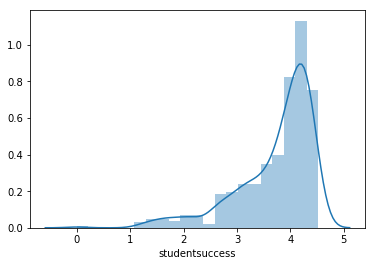

In [27]:
sns.distplot(np.log(df["studentsuccess"]))

# hedef değişkenin logaritmasının histogramını çizdirdiğimizde, hala normal dağılım olmadığı görülmektedir.

# Principal Component Analysis

In [76]:
df.head()

,index,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,...,weighted_av,weighted_dis,studentsuccess,normalized_studentsuccess,absence_days,mother_father,satisfaction,male_female,semester,level
0,0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,...,2,2,13.25000000,1.00000000,0,0,1,1,0,1
1,1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,...,2,2,17.00000000,1.00000000,0,0,1,1,0,1
2,2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,...,2,3,13.77777778,1.00000000,1,0,0,1,0,1
3,3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,...,2,3,25.50000000,1.00000000,1,0,0,1,0,1
4,4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,...,2,3,40.36363636,1.00000000,1,0,0,1,0,1


In [73]:
# Hedef değişkeni açıklamada kullanacağım özellikler kategorik değişken olduğu için sürekli değişkene dönüştürülmesi gerekmektedir.

df["absence_days"]=pd.get_dummies(df["StudentAbsenceDays"], drop_first=False)
df["mother_father"]=pd.get_dummies(df["Relation"], drop_first=True)
df["satisfaction"]=pd.get_dummies(df["ParentschoolSatisfaction"], drop_first=True)
df["male_female"]=pd.get_dummies(df["gender"], drop_first=True)
df["semester"]=pd.get_dummies(df["Semester"], drop_first=True)

In [69]:
# StageId değişkenini de sürekli değişkene dönüştürelim

df["level"]=np.nan

for i in range(len(df["StageID"])):
    if df["StageID"][i]=="lowerlevel":
        df["level"][i]=1
    elif df["StageID"][i]=="MiddleSchool":
        df["level"][i]=2
    elif df["StageID"][i]=="HighSchool":
        df["level"][i]=3

df["level"]=df["level"].astype('int')

In [77]:
# PCA' nin temel amacı, hedef değişkeniyle ortak en büyük varyansa sahip olan özellikleri seçmektir.En az sayıdaki bileşen ile en büyük varyansı açıklayacak
# değişkenleri seçerek çok boyutluluk lanetinden kurtulmayı hedeflerim.
# Bu projede hedef değişken(studentsucces) ile en büyük varyansı paylaşan optimum sayıdaki bileşenin seçimi yapılmaktadır.

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [81]:
# studentsuccess değişkeniyle en büyük varyansı paylaşan aşağıda tanımlı özelliklerden anlamlı olanları seçilmelidir

df_new=df[["absence_days","mother_father","satisfaction","male_female","semester","level","studentsuccess"]]

X=df_new.values

In [85]:
X=StandardScaler().fit_transform(df_new)

pca=PCA(n_components=7)
principalComponents=pca.fit_transform(X)

In [86]:
exp_var=pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(exp_var,"\n")
print(cumsum_var)

# df veri setinde toplam varyansın %84'ü 5. temel bileşen ile açıklanmaktadır; toplam varyansın yaklaşık %30'u da birinci temel bileşen ile açıklanmaktadır.

[0.30555154 0.15785892 0.147646   0.12929907 0.10656289 0.08883649
 0.0642451 ] 

[ 30.56  46.35  61.11  74.04  84.7   93.58 100.  ]


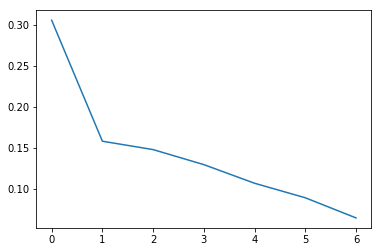

In [88]:
plt.plot(exp_var);

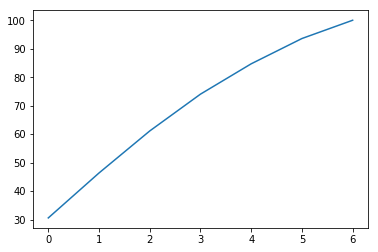

In [90]:
plt.plot(cumsum_var);

# Conclusion




Veri temizliği, veri keşfi ile başlayıp özellik mühendisliği ile devam eden projede, öğrencilerin başarısında ailenin etkisinin olup olmadığı ve de öğrenci başarısını açıklayacak özelliklerin belirlenmesi konuları araştırılmıştır.

Araştırma konularıyla ilgili olan değişkenler görselleştirildikten sonra istatistiksel olarak da kanıtlamak için t-test ve ki-kare testleri yapılmıştır.
Testler sonucunda; 
* Öğrenci başarısı ile velinin okuldan memnun olması arasında anlamlı bir ilişki bulunmaktadır.
* Öğrenci başarısı ile öğrencinin okul devamlılığı arasında anlamlı bir ilişki bulunmaktadır.
* Öğrenci başarısı ile velinin anne/baba olması arasında anlamlı bir fark vardır.
* Öğrenci başarısı ile öğrencinin dersi takip etme sıklığı arasında anlamlı bir ilişki bulunmaktadır.
* Ülkeler ve bölümler arasında anlamlı bir ilişki bulunmaktadır.
* Ülkelere göre aile memnuniyeti arasında anlamlı bir ilişki yoktur.

Öğrenci başarısını tahmin etmede kullanılacak 6 farklı özellikten modeli en iyi açıklayacak olan %84 ile ilk 5 özelliktir.

Çok fazla değişken olduğunda çok boyutluluk lanetinden dolayı bir değişkende yapılan küçük bir değişikliğin etkisinin çok fazla olacağından dolayı genelde az değişkenle en çok varyansı açıklayacak bileşenler seçilir. Yani PCA analizinde en az sayıda bileşen ile maksimum varyansı açıklayacak kadar değişken modelimiz için yeterlidir denilebilir.